In [2]:
from pytrends.request import TrendReq
import pandas as pd

pytrends = TrendReq()

search_terms = ["air quality", "aqi"]

# Pull regional data at STATE level instead of CITY
pytrends.build_payload(search_terms, geo="IN", timeframe="today 12-m")

state_data = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True)

# Clean format
df = state_data.reset_index().melt(id_vars="geoName", var_name="term", value_name="search_interest")
df.rename(columns={"geoName": "state"}, inplace=True)
print(df)
#df.to_csv("google_trends_state_level.csv", index=False)
print("✅ Saved: google_trends_state_level.csv")

                          state         term  search_interest
0   Andaman and Nicobar Islands  air quality               34
1                Andhra Pradesh  air quality               25
2             Arunachal Pradesh  air quality               33
3                         Assam  air quality               22
4                         Bihar  air quality               15
..                          ...          ...              ...
67                    Telangana          aqi               74
68                      Tripura          aqi               74
69                Uttar Pradesh          aqi               85
70                  Uttarakhand          aqi               81
71                  West Bengal          aqi               77

[72 rows x 3 columns]
✅ Saved: google_trends_state_level.csv


C:\Users\sugan\AppData\Local\Temp\ipykernel_16416\1536945871.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['internet_reach'] = df_top['state'].map(internet_reach)
C:\Users\sugan\AppData\Local\Temp\ipykernel_16416\1536945871.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['estimated_awareness'] = (df_top['search_interest'].astype(float) / 100) * df_top['internet_reach']


             state  search_interest  internet_reach  estimated_awareness
1   Andhra Pradesh               75            0.59               0.4425
3            Assam               78            0.36               0.2808
4            Bihar               85            0.30               0.2550
9            Delhi               88            0.80               0.7040
12         Haryana               86            0.66               0.5676
16       Karnataka               76            0.68               0.5168
17          Kerala               72            0.70               0.5040
19  Madhya Pradesh               82            0.42               0.3444
25          Odisha               81            0.38               0.3078
27          Punjab               75            0.70               0.5250
28       Rajasthan               79            0.52               0.4108
30      Tamil Nadu               74            0.67               0.4958
31       Telangana               74            0.83

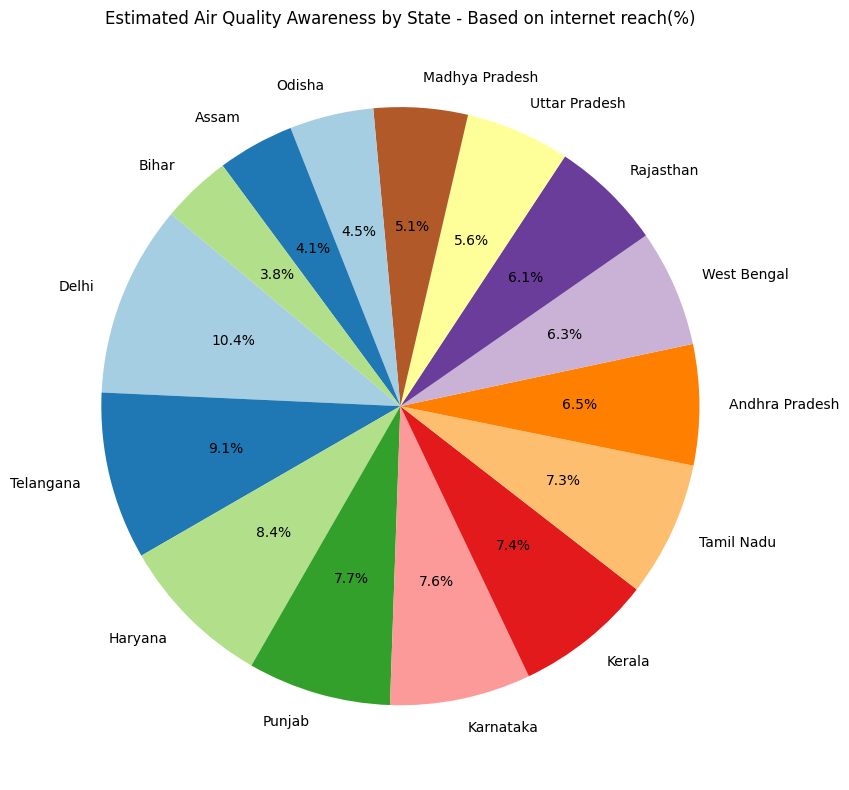

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("google_trends_state_level.csv")
top_states = ['Bihar', 'Haryana', 'Uttar Pradesh', 'Rajasthan', 'Assam',
              'Madhya Pradesh', 'Delhi', 'Odisha', 'Punjab', 'West Bengal','Kerala',
              'Telangana','Tamil Nadu','Karnataka','Andhra Pradesh']
df_top = df[df['state'].isin(top_states)]

# Aggregate search interest by state
state_trends = df_top.groupby('state')['search_interest'].sum().reset_index()

search_interest = df_top['search_interest']

internet_reach = {
    "Delhi": 0.80,
    "Haryana": 0.66,
    "Punjab": 0.70,
    "West Bengal": 0.55,
    "Rajasthan": 0.52,
    "Uttar Pradesh": 0.45,
    "Madhya Pradesh": 0.42,
    "Odisha": 0.38,
    "Assam": 0.36,
    "Bihar": 0.30,
    "Kerala": 0.70,
    "Telangana": 0.83,
    "Karnataka": 0.68,
    "Tamil Nadu": 0.67,
    "Andhra Pradesh": 0.59
}

# Create a new column for internet reach
df_top['internet_reach'] = df_top['state'].map(internet_reach)

# Calculate estimated awareness
df_top['estimated_awareness'] = (df_top['search_interest'].astype(float) / 100) * df_top['internet_reach']

# Sort by awareness
df_awareness = df_top[['state', 'search_interest', 'internet_reach', 'estimated_awareness']].copy()
print (df_awareness)
df_awareness.rename(columns={
    'state': 'State',
    'search_interest': 'Search Score',
    'internet_reach': 'Internet Reach %',
    'estimated_awareness': 'Estimated Awareness %'
}, inplace=True)

df_awareness.sort_values(by='Estimated Awareness %', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
plt.pie(df_awareness['Estimated Awareness %'], labels=df_awareness['State'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Estimated Air Quality Awareness by State - Based on internet reach(%)')
plt.tight_layout()
plt.show()
